In the last lecture, we made us of the tools available through `scikit-learn` in order to classify handwritten digits. While these basic classifiers can be used to handle image datasets, there is an algorithm that is tailor-made for image datasets known as convolutional neural networks.

Reference:

https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5
https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac
https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/

In this example, we will try something a little harder: color images of .

In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.
C:\Users\koolk\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\koolk\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\koolk\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\koolk\Anaconda3\envs\keras\lib\site-pa

Similar to our previous example, we will split the data into test and training datasets:

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Before doing any machine learning, let's take a look at what we're dealing with.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

[1]


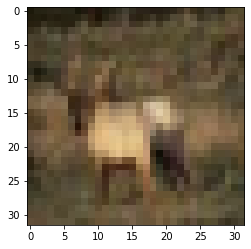

In [9]:
plt.imshow(X_train[3])
print(y_train[4])

This dataset has ten classes of objects. See if you can figure out what each class corresponds to.

We found:

0. Planes
1. Cars
2. Birds
3. Cats
4. Deer
5. Dogs
6. Frogs
7. Horses
8. Boats
9. Trucks

In [19]:
output_key = {0: 'planes',
              1: 'cars',
              2: 'birds',
              3: 'cats',
              4: 'deer',
              5: 'dogs',
              6: 'frogs',
              7: 'horses',
              8: 'boats',
              9: 'trucks'}

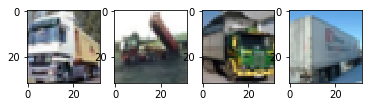

In [6]:
test = np.where(y_train == 9)
test = test[0][0:4]

fig, axes = plt.subplots(1, 4)

for ax, ti in zip(axes, test):
    ax.imshow(X_train[ti])

Before we can train the CNN, we need to check the shape of our dataset. In this case, we will not flatten the objects like we did previously. Let's check the shape of a single object in the test dataset. Keras expects as input (number of samples, dimension 1, dimension 2, colors).

In [10]:
X_train.shape

(50000, 32, 32, 3)

The other thing different about Keras is that the target variable must be encoded in a binary representation. Instead of having 10 integers represent each category, a 1 in the first column will represent 0, a 1 in the second column will represent 1, etc.

In [11]:
from keras.utils import to_categorical

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

Now we are ready to build a CNN model. I pulled this model directly from the Keras documentation. Based on the architecture we discussed above, let's see if we can draw out what our CNN looks like

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation

In [10]:
# Create model
model = Sequential()

# Add layers to model
model.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=100,
          validation_data=(X_test, y_test), shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 357s 7ms/step - loss: 1.8244 - acc: 0.3315 - val_loss: 1.6553 - val_acc: 0.3897
Epoch 2/100
50000/50000 [==============================] - 332s 7ms/step - loss: 1.5101 - acc: 0.4526 - val_loss: 1.4177 - val_acc: 0.4924
Epoch 3/100
50000/50000 [==============================] - 312s 6ms/step - loss: 1.3775 - acc: 0.5058 - val_loss: 1.2444 - val_acc: 0.5602
Epoch 4/100
50000/50000 [==============================] - 308s 6ms/step - loss: 1.2803 - acc: 0.5420 - val_loss: 1.1794 - val_acc: 0.5812
Epoch 5/100
50000/50000 [==============================] - 337s 7ms/step - loss: 1.2012 - acc: 0.5733 - val_loss: 1.1608 - val_acc: 0.5887
Epoch 6/100
50000/50000 [==============================] - 319s 6ms/step - loss: 1.1341 - acc: 0.6005 - val_loss: 1.0829 - val_acc: 0.6153
Epoch 7/100
50000/50000 [==============================] - 311s 6ms/

In [13]:
model.save('test_model.h5')

In [16]:
test_model = keras.models.load_model('test_model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [18]:
test_p = test_model.predict(X_test)

Did it work? Let's compare the actual category with the predicted.

In [25]:
output_key = {0: 'planes'}

(6, 32, 32, 3)

Predicted: 6 (frogs)
Actual: 6 (frogs)


(-0.5, 31.5, 31.5, -0.5)

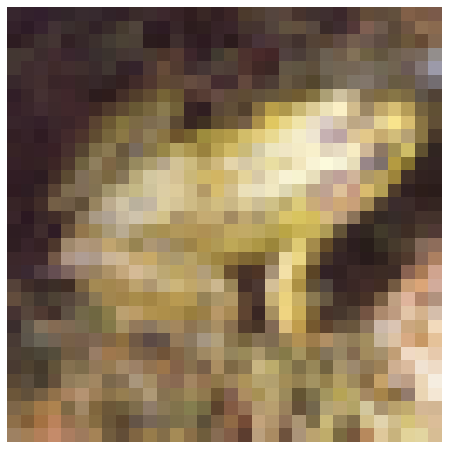

In [49]:
i = 19
y_pred = np.argmax(test_p, axis=1)
y_act = np.argmax(y_test, axis=1)

print('Predicted: {} ({})'.format(y_pred[i], output_key[y_pred[i]]))
print('Actual: {} ({})'.format(y_act[i], output_key[y_act[i]]))

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(X_test[i])
ax.axis('off')

Let's quantify the results using `skimage.classification_report` and `skimage.confusion_matrix`.

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print(classification_report(y_act, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.60      0.51      1000
           1       0.25      0.96      0.39      1000
           2       0.71      0.05      0.09      1000
           3       0.32      0.33      0.32      1000
           4       0.75      0.10      0.17      1000
           5       0.67      0.18      0.28      1000
           6       0.68      0.40      0.50      1000
           7       0.68      0.37      0.48      1000
           8       0.48      0.64      0.55      1000
           9       0.60      0.46      0.53      1000

    accuracy                           0.41     10000
   macro avg       0.56      0.41      0.38     10000
weighted avg       0.56      0.41      0.38     10000



In [62]:
cmatrix = confusion_matrix(y_act, y_pred)

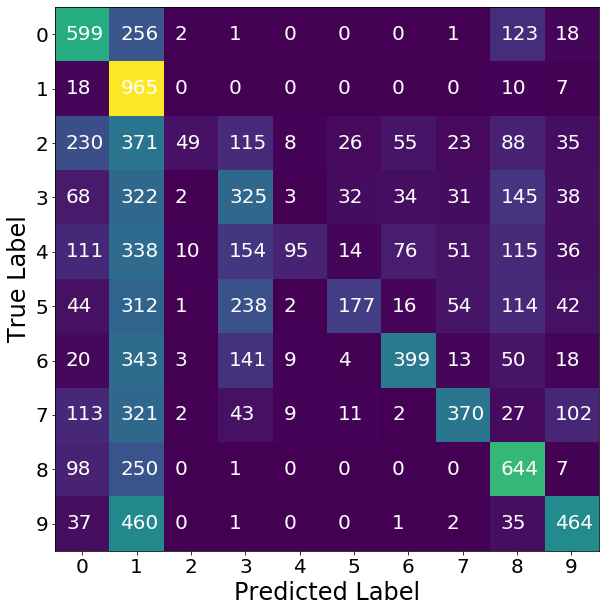

In [97]:
fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(cmatrix)
#ax.axis('off')
ax.set_ylabel('True Label', fontsize=24)
ax.set_xlabel('Predicted Label', fontsize=24)
ax.set_xticks(list(output_key.keys()))
ax.set_xticklabels(list(output_key.keys()), fontsize=20)
ax.set_yticks(list(output_key.keys()))
ax.set_yticklabels(list(output_key.keys()), fontsize=20)

for i in range(10):
    for j in range(10):
        ax.text(i-0.3, j+0.1, cmatrix[j, i], fontsize=20, c='w')

The confusion matrix is a really good way of diagnosing exactly where our model is messing up. For instance, I can tell by reading row 9 that the model tends to mistake trucks for cars, and does so about 50% of the time. But the inverse isn't true: it rarely mistakes a car for a truck. What else do you notice about this classifier?

How could we improve our classifier? This model just may not have enough filters to identify key features in the images. Increasing the number of filters would be one step. I also wasn't able to train this CNN for very long, so just increasing the number of epochs could also improve it's performance. [This version](https://keras.io/examples/cifar10_cnn/) of the code also performs a data augmentation step by performing transformations of the input images to make a larger training dataset-- also another option.

One other useful thing to do with CNNs is to extract the filters and feature masks being used underneath the hood. 

In [99]:
for layer in test_model.layers:
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d_1 (3, 3, 3, 32)
conv2d_2 (3, 3, 32, 32)
conv2d_3 (3, 3, 32, 64)
conv2d_4 (3, 3, 64, 64)


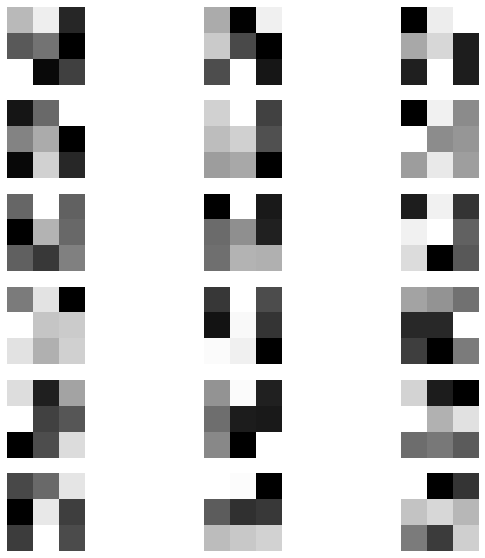

In [114]:
filters, biases = test_model.layers[0].get_weights()

# normalize filter values to 0-1 for visualization
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)


fig, axes = plt.subplots(6, 3, figsize=(10,10))
# plot the first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        axes[i, j].imshow(f[:,:,j], cmap='gray')
        axes[i,j].axis('off')
        

In [116]:
from keras.models import Model

In [117]:
# Define a new model to output right after the first hidden layer
model = Model(inputs=test_model.inputs, outputs=test_model.layers[0].output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


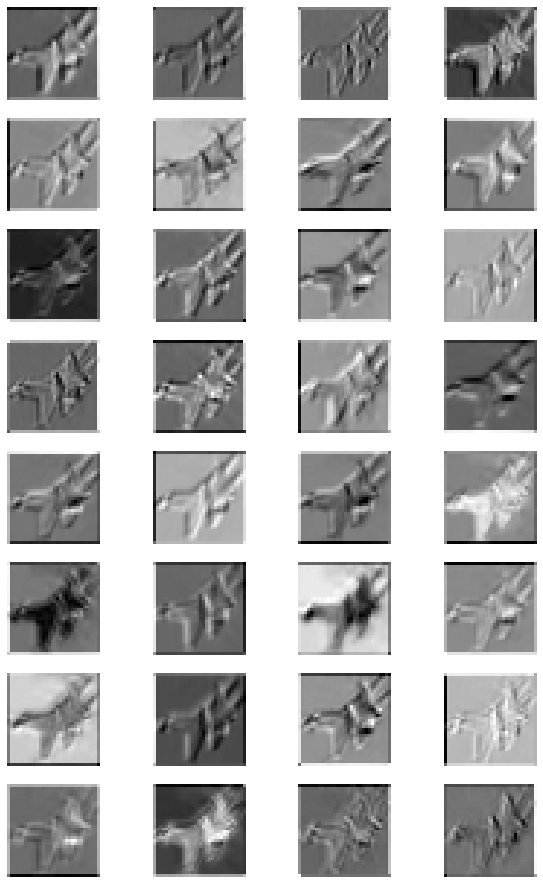

In [138]:
# Load an image
im = X_test[10]
im = im.reshape((1,32,32,3))
feature_maps = model.predict(im)

fig, axes = plt.subplots(8, 4, figsize=(10,16))
ix = 0
for i in range(8):
    for j in range(4):
        axes[i,j].imshow(feature_maps[0,:,:,ix], cmap='gray')
        axes[i,j].axis('off')
        ix += 1

In [137]:
np.max(feature_maps)

113.925865